# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

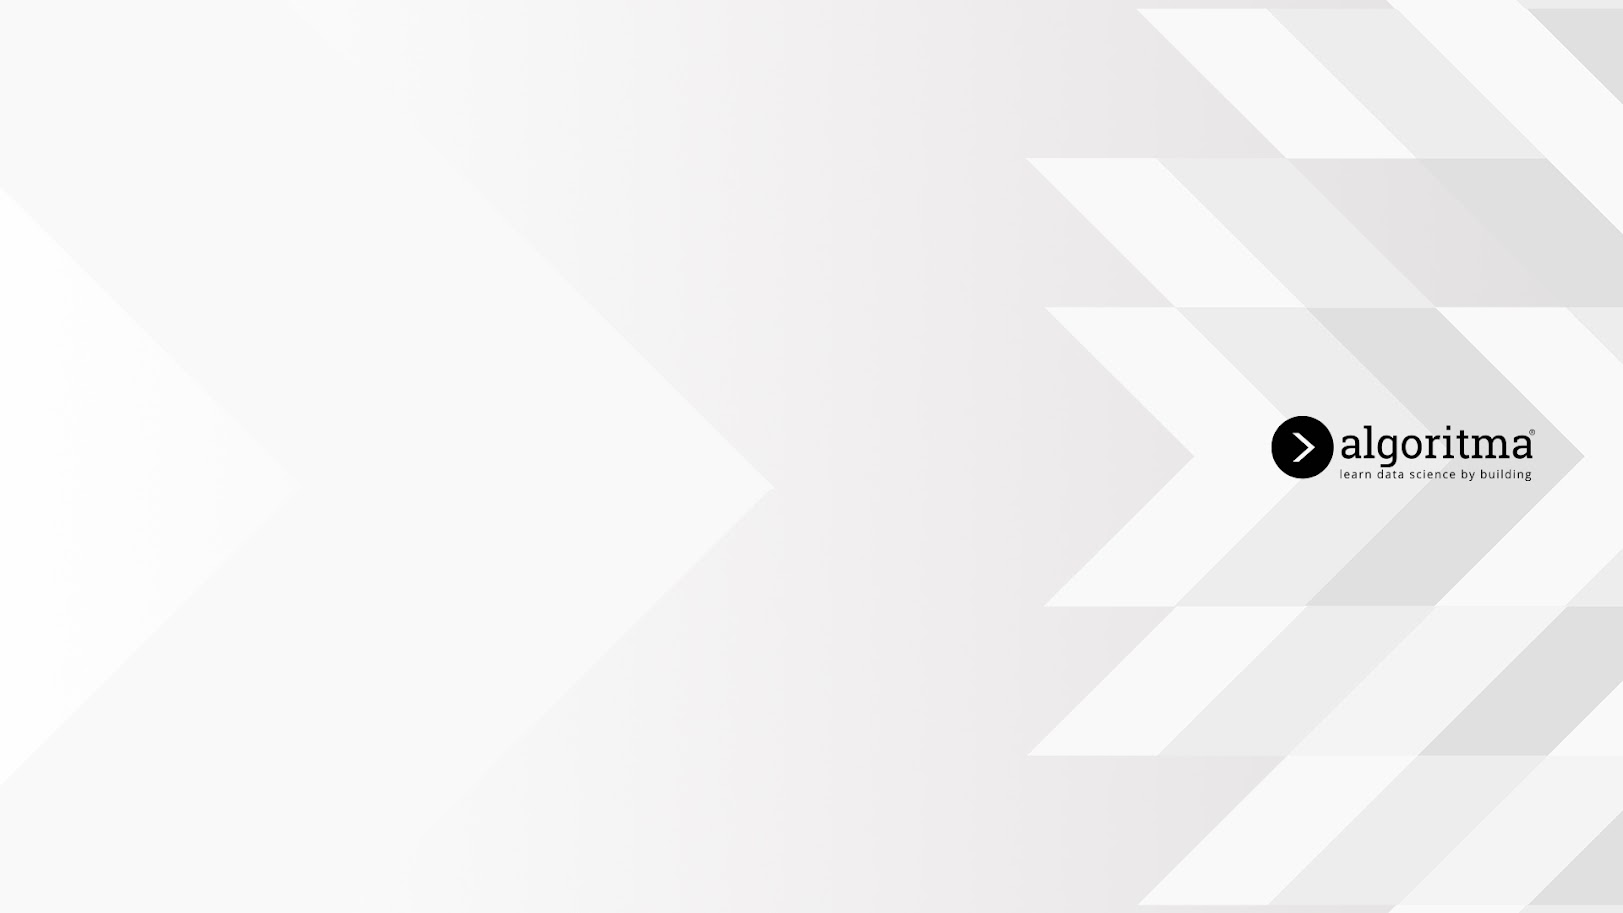

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method. Tapi sebelumnya, saya lebih suka membuat beberapa sytax (atau apa ya disebutnya, pokoknya perintah-perintah seperti yang tulisan warna hijau di bawah ini. Saya lebih suka menjalankan mereka dulu diawal, supaya tidak ada yang lupa. Baru mulai masuk ke syntax selanjutnya.

In [2]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data#panel',  headers = { 'User-Agent': 'Popular browser\'s user-agent', })

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [4]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js"></script><script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" '

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [6]:
soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

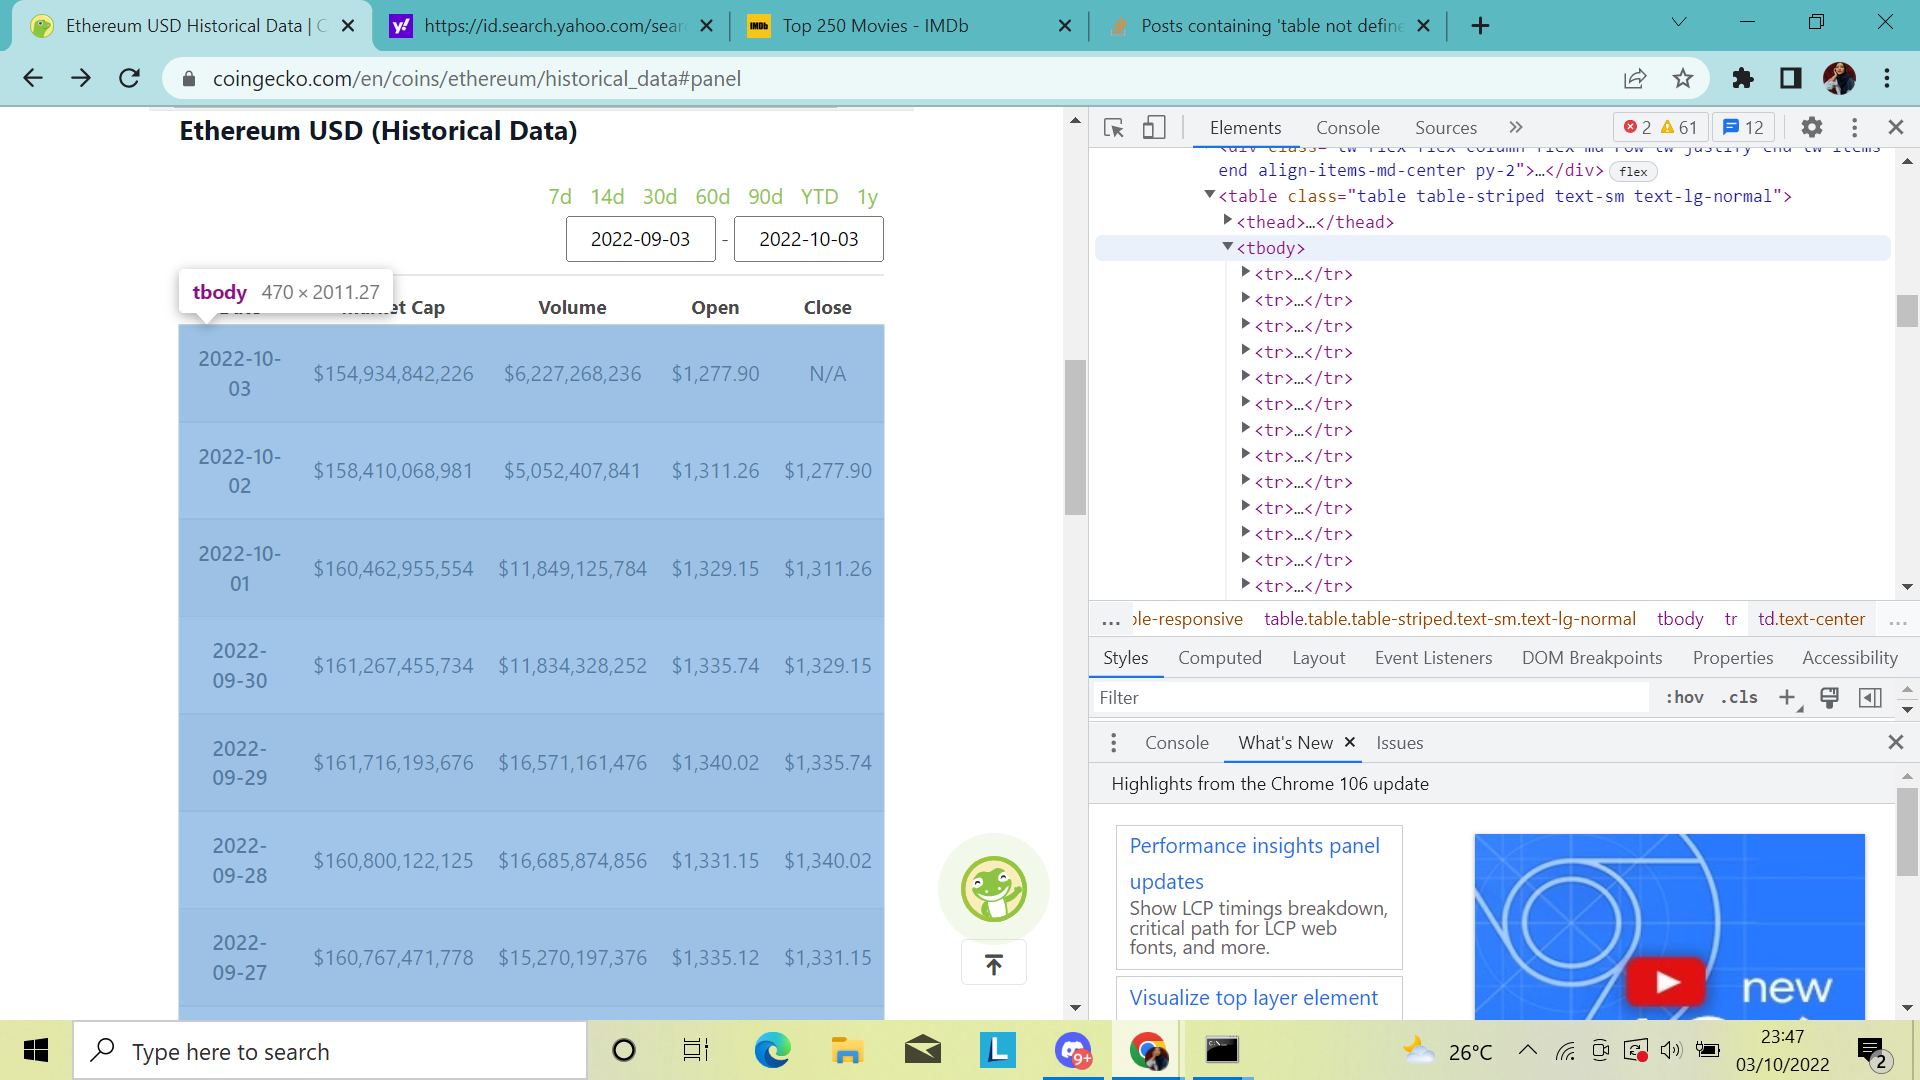Di sini kita akan memakai '.find() untuk mencari kata kunci (key) yang tepat demi mendapatkan ekstrasi informasi dari website yang telah kita tarik datanya. Pada gambar yang telah dilampirkan, data yang akan kita ambil adalah data tabel tanpa header.  Yang mana code enkripsi ditandai dengan (tbody).

In [8]:
table = soup.find('tbody')
print(table.prettify()[1:500])

tbody>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2022-10-03
  </th>
  <td class="text-center">
   $154,934,842,226
  </td>
  <td class="text-center">
   $6,227,268,236
  </td>
  <td class="text-center">
   $1,277.90
  </td>
  <td class="text-center">
   N/A
  </td>
 </tr>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2022-10-02
  </th>
  <td class="text-center">
   $158,410,068,981
  </td>
  <td class="text-center">
   $5,052,407,841
  </td>
  <td class="text


Finding row length.

In [9]:
table.find_all('th', attrs={'class':"font-semibold text-center"})[0].text

'2022-10-03'

In [10]:
row = table.find_all('th', attrs={'class':"font-semibold text-center"})
row_length = len(row)
row_length

31

Do the scrapping process here (please change this markdown with your explanation)

In [11]:
temp = [] #init

for i in range(0, row_length):
    
    #get date 
    date = table.find_all('th', attrs={'class':"font-semibold text-center"})[i].text
    
    #get volume
    volume = table.find_all('td', attrs={'class':'text-center'})[i].text
    volume = volume.strip() #to remove excess white space
    
    temp.append((date,volume))
    
temp

[('2022-10-03', '$154,934,842,226'),
 ('2022-10-02', '$6,227,268,236'),
 ('2022-10-01', '$1,277.90'),
 ('2022-09-30', 'N/A'),
 ('2022-09-29', '$158,410,068,981'),
 ('2022-09-28', '$5,052,407,841'),
 ('2022-09-27', '$1,311.26'),
 ('2022-09-26', '$1,277.90'),
 ('2022-09-25', '$160,462,955,554'),
 ('2022-09-24', '$11,849,125,784'),
 ('2022-09-23', '$1,329.15'),
 ('2022-09-22', '$1,311.26'),
 ('2022-09-21', '$161,267,455,734'),
 ('2022-09-20', '$11,834,328,252'),
 ('2022-09-19', '$1,335.74'),
 ('2022-09-18', '$1,329.15'),
 ('2022-09-17', '$161,716,193,676'),
 ('2022-09-16', '$16,571,161,476'),
 ('2022-09-15', '$1,340.02'),
 ('2022-09-14', '$1,335.74'),
 ('2022-09-13', '$160,800,122,125'),
 ('2022-09-12', '$16,685,874,856'),
 ('2022-09-11', '$1,331.15'),
 ('2022-09-10', '$1,340.02'),
 ('2022-09-09', '$160,767,471,778'),
 ('2022-09-08', '$15,270,197,376'),
 ('2022-09-07', '$1,335.12'),
 ('2022-09-06', '$1,331.15'),
 ('2022-09-05', '$156,146,367,767'),
 ('2022-09-04', '$10,552,647,870'),
 ('2

## Creating data frame & Data wrangling

Put the array into dataframe

In [12]:
df = pd.DataFrame(temp, columns = ('date','volume'))

df.head()

,date,volume
0,2022-10-03,"$154,934,842,226"
1,2022-10-02,"$6,227,268,236"
2,2022-10-01,"$1,277.90"
3,2022-09-30,N/A
4,2022-09-29,"$158,410,068,981"


Untuk kolom [volume] perlu dilakukan penghilangan koma dan simbol $, lalu dilakukan perubahan type data menjadi int64, namun saya sudah coba oprek, tetapi hasilnya selalu error. Jadi saya berharap, jika ada yang perlu saya perbaiki tolong diberi komen dan masukan.

In [14]:
df['date'] = df['date'].astype('datetime64')
df['volume'] = df['volume'].str.replace(","," ").replace('$', ' ')

df.dtypes

date      datetime64[ns]
volume            object
dtype: object

In [15]:
%matplotlib notebook

<IPython.core.display.Javascript object>


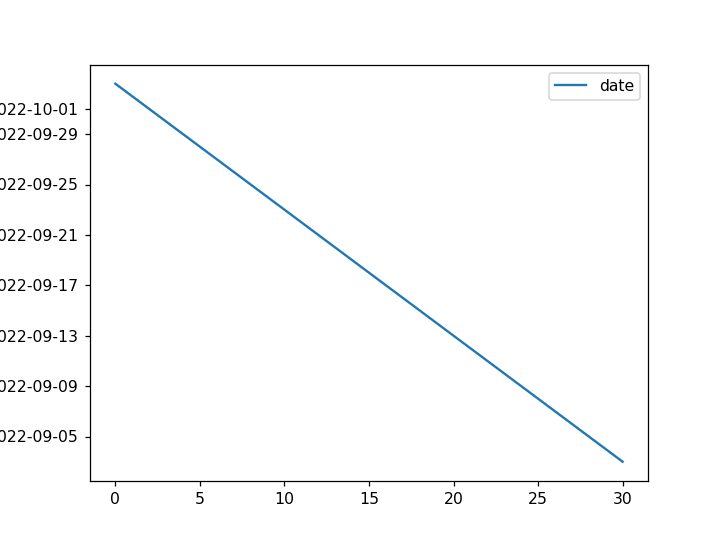

<AxesSubplot:>

In [16]:
df.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

Maaf, saya tidak bisa menganalisa karena bentuk diagram saya absurd. Tolong beri tahu saya, bagian mana yang harus diperbaiki.


(Put your analysis and conclusion here.)

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.